In [ ]:
import csv
import hashlib as h
import numpy as np
import os

class Shingling:
    k: int
    word: bool
    shingle: list[str]
    hashShingle: list[str]
    removeCaracter: list[str]

    def __init__(self, k: int = 1, word = False) -> None:
        self.k = k
        self.word = word
        self.removeCaracter = '()+=-_!,;.:/?'
    
    def _read_file(self, file_path: str) -> str:
        """
        Lecture du fichier .csv ou .txt
        Retourne tout le texte en minuscule.
        """
        ext = os.path.splitext(file_path)[1].lower()

        # Lecture CSV
        if ext == ".csv":
            with open(file_path, newline='', encoding='utf-8') as f:
                reader = csv.reader(f)
                text_list = []
                for row in reader:
                    if row and row[0].strip():
                        text_list.append(row[0].strip())
                return " ".join(text_list).lower()

        # Lecture TXT
        elif ext == ".txt":
            with open(file_path, "r", encoding="utf-8") as f:
                return f.read().lower()

        else:
            raise ValueError(f"Format de fichier non pris en charge : {file_path}")
        
    #def kShingling(self, csvFile: str) -> list[str]:
    def kShingling(self, file_path: str) -> list[str]:
        # oneShingle = []
        # with open(csvFile, newline='',encoding='utf-8') as f:
        #     reader = csv.reader(f)
        #     for row in reader:
        #         if row and row[0].strip():  # ignorer ligne vide
        #             text = row[0].strip()
        #             break
        #     else:
        #         raise ValueError(f"{csvFile} est vide ou ne contient que des lignes vides.")
        #     row = next(reader)
        #     oneShingle = list(row)
        #     #print(oneShingle)
        # text = oneShingle[0]
        text = self._read_file(file_path)
        kShingle = []

        #text = text.lower()
        
        for i in range(len(self.removeCaracter)):
            text = text.replace(self.removeCaracter[i],"")

        if(self.word):
            wordList = text.split(" ")
            for i in range(len(wordList)):
                if(i+self.k>len(wordList)):
                    self.shingle = kShingle
                    #print(kShingle)
                    return kShingle
                key = ''
                for j in range(self.k):
                    key += wordList[i+j] + ' '
                key = key[:len(key)-1]
                kShingle.append(key)
        else:
            for i in range(len(text)):
                if(i+self.k>len(text)):
                    self.shingle = kShingle
                    return kShingle
                key = ''
                for j in range(self.k):
                    key += text[i+j]
                kShingle.append(key)
        self.shingle = kShingle
        return kShingle

    
    #def hashShingling(self, csvFile: str) -> list[int]:
    def hashShingling(self, file_path: str) -> list[str]:
        hashShingle = []
        kShingle = self.kShingling(file_path)
        for word in kShingle:
            #res = h.md5(word.encode())
            hashShingle.append(h.md5(word.encode()))
        self.hashShingle = hashShingle
        return hashShingle
    
    def uniqueHashShingling(self, csvFile: str) -> list[int]:
        hashShingle = []
        kShingle = self.kShingling(csvFile)
        #print(kShingle)
        kShingle = np.unique(kShingle)
        for word in kShingle:
            hashShingle.append(h.md5(word.encode()).hexdigest())
        self.hashShingle = hashShingle
        return hashShingle

In [4]:
import time

class CompareSets:
    def __init__(self) -> None:
        print('Compare Sets class')
        
    def getJaccardSim(self,set1,set2) -> float:
        inter = 0
        union = 1
        s = time.time()
        for hash1 in set1:
            for hash2 in set2:
                if(hash1==hash2):
                    inter += 1
        union = len(np.unique(set1 + set2))
        computeTime = round((s-time.time()*1000,3)) #ms
        return inter/union, computeTime

In [5]:
# import numpy as np

# class MinHashing:
#     def __init__(self) -> None:
#         print('MinHashing class')
        
#     def buildSignature(self,set1,set2,nbPermut) -> float:
        
#         union = np.unique(set1 + set2)
#         mask1 = np.isin(union, set1)
#         mask2 = np.isin(union, set2)
        
#         signatureMatrix = np.empty((0, 2), int)
#         for _ in range(nbPermut):
#             permutedIndexes = np.random.permutation(len(union))
#             lineSignatureMatrix = np.zeros((1,2))
#             for i in range(len(permutedIndexes)):
#                 if(mask1[permutedIndexes[i]]):
#                     lineSignatureMatrix[0][0]=i
#                     break
#             for j in range(len(permutedIndexes)):
#                 if(mask2[permutedIndexes[j]]):
#                     lineSignatureMatrix[0][1]=j
#                     break
#             signatureMatrix = np.vstack((signatureMatrix, lineSignatureMatrix))

#         return signatureMatrix

MinHashing (Using Hashing functions)

In [6]:
import random
class MinHashing:
    """""
    num_hashes : number of generated hashing functions
    max_hash : the c parameter (modulo)

    """""

    def __init__(self, num_hashes=100, max_hash=2**32 - 1, seed=None):
        if seed is not None:
            random.seed(seed)
        self.num_hashes = num_hashes
        self.max_hash = max_hash
        #Generating the function parameters a , b
        self.hash_params = [
            (random.randint(1, self.max_hash - 1),
             random.randint(0, self.max_hash - 1))
            for _ in range(num_hashes)
        ]

    def ComputeSignatures(self, shingle_set):
        signature = []
        for (a, b) in self.hash_params:
            min_hash = min(((a * x + b) % self.max_hash) for x in shingle_set)
            signature.append(min_hash)
        return signature

    # def EstimateSimilarity(self, sig1, sig2):
    #     matches = sum(1 for a, b in zip(sig1, sig2) if a == b)
    #     return matches / len(sig1)

In [7]:
import numpy as np

class CompareSignatures:
    def __init__(self) -> None:
        print('Compare Signatures class')
        
    def computeEstimateSimilarity(self,signature) -> float:
        signature = signature.T
        
        y = signature[0]-signature[1]
        y = np.where(y==0,1,0)
        return np.sum(y)/len(y)

In [8]:
import hashlib as h

class LocalSensitiveHash:
    band: int
    r: int
    threshold: int

    def __init__(self, band : int, threshold : int) -> None:
        self.band = band
        self.threshold = threshold

    def lookForCandidates(self,signature,col1 : int = 0,col2 : int = 1) -> float:
        
        self.r = int(len(signature)/self.band)
        similarities = 0
        if(self.r * self.band == len(signature)):
            signature = signature.T
            for i in range(self.band):
                band1 = str(signature[col1][i:i+self.r])
                band2 = str(signature[col2][i:i+self.r])
                
                if(h.md5(band1.encode()).hexdigest()==h.md5(band2.encode()).hexdigest()):
                    similarities += 1
                    print("similarity found")
            print(f"similarities = {similarities/self.band}")
            if(similarities/self.band >= self.threshold):
                return 1
            else:
                return 0
            
        else:
            print("Wrong size")
            return -1

In [9]:
# LSHasher = LocalSensitiveHash(25,0.8) 
# estimator = CompareSignatures()
# miniHasher = MinHashing()
# comparator = CompareSets()

# fiveShingler = Shingling(3,False)

# #kShingle = fiveShingler.kShingling('test.csv')
# #hashList = fiveShingler.uniqueHashShingling('test.csv')
# #print(f"len = {len(hashList)}")
# hashShingle = fiveShingler.uniqueHashShingling('1.csv')
# test3 = fiveShingler.uniqueHashShingling('2.csv')
# #print(kShingle)
# #print(hashShingle)

# similarity = comparator.getJaccardSim(hashShingle,test3)
# signature = miniHasher.buildSignature(hashShingle,test3,nbPermut=10000)
# estimate = estimator.computeEstimateSimilarity(signature)
# #print(f"longueur de la signature {len(signature)}")
# retour = LSHasher.lookForCandidates(signature)
# print(f"r = {LSHasher.r}, retour de LSH {retour}")

# #print(signature)
# print(similarity)
# print(estimate)

Adapting the previous test to work with many docs

In [26]:
import numpy as np
import itertools

# --- Initialisation des classes ---
LSHasher = LocalSensitiveHash(band=20, threshold=0.8)
estimator = CompareSignatures()
miniHasher = MinHashing(num_hashes=1000, seed=42)  # version fcts de hachage
comparator = CompareSets()
Shinglers = Shingling(k=3, word=False)

# --- Liste des fichiers à comparer ---
docs = ["1.csv", "2.csv", "3.csv","4.csv","5.csv"]

# --- Récupération des shingles pour chaque doc ---
shingles_dict = {}
signatures = {}
builSignaturetime = []
for doc in docs:
    shingles = Shinglers.uniqueHashShingling(doc)
    shingles_int = [int(x,16) for x in shingles]
    shingles_dict[doc] = shingles_int
    
    # signature MinHash (fcts de hachage)
    e = time.time()
    sig = miniHasher.ComputeSignatures(shingles_int)
    builSignaturetime.append((e-time.time())*1000,3)
    signatures[doc] = sig

# --- Comparaison par paires ---
for doc1, doc2 in itertools.combinations(docs, 2):
    # Construire la matrice 2 x num_hashes
    sig_matrix = np.array([signatures[doc1], signatures[doc2]]).T
    
    # LSH
    candidate = LSHasher.lookForCandidates(sig_matrix)
    
    print(f"\nComparing {doc1} <-> {doc2}")
    print(f"r = {LSHasher.r}, retour de LSH {candidate}")
    
    # Similarité exacte (Jaccard)
    exact = comparator.getJaccardSim(shingles_dict[doc1], shingles_dict[doc2])
    
    # Similarité estimée par MinHash
    estimate = estimator.computeEstimateSimilarity(sig_matrix)
    
    print(f"Exact Jaccard: {exact:.4f}")
    print(f"Estimated MinHash: {estimate:.4f}")



# import numpy as np
# import itertools

# # --- Initialisation des classes ---
# LSHasher = LocalSensitiveHash(band=25, threshold=0.8)
# estimator = CompareSignatures()
# miniHasher = MinHashing()  # version permutations
# comparator = CompareSets()
# Shinglers = Shingling(k=3, word=False)

# # --- Liste des fichiers à comparer ---
# docs = ["1.csv", "2.csv", "3.csv"]  # tu peux en ajouter autant que tu veux

# # --- Récupération des shingles pour chaque doc ---
# shingles_dict = {}
# for doc in docs:
#     shingles = Shinglers.uniqueHashShingling(doc)
#     shingles_int = [int(x,16) for x in shingles]
#     shingles_dict[doc] = shingles_int

# # --- Comparaison par paires ---
# for doc1, doc2 in itertools.combinations(docs, 2):
#     # Construire la signature MinHash (version permutations)
#     sig_matrix = miniHasher.buildSignature(shingles_dict[doc1], shingles_dict[doc2], nbPermut=10000)
    
#     # Vérifier si LSH considère les documents comme proches
#     candidate = LSHasher.lookForCandidates(sig_matrix)
    
#     # Affichage des résultats comme dans ta version simple
#     print(f"\nComparing {doc1} <-> {doc2}")
#     print(f"r = {LSHasher.r}, retour de LSH {candidate}")
    
#     # Similarité exacte (Jaccard)
#     exact = comparator.getJaccardSim(shingles_dict[doc1], shingles_dict[doc2])
    
#     # Similarité estimée par MinHash
#     estimate = estimator.computeEstimateSimilarity(sig_matrix)
    
#     print(f"Exact Jaccard: {exact:.4f}")
#     print(f"Estimated MinHash: {estimate:.4f}")



Compare Signatures class
Compare Sets class
similarities = 0.0

Comparing 1.csv <-> 2.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0789
Estimated MinHash: 0.0700
similarities = 0.0

Comparing 1.csv <-> 3.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0517
Estimated MinHash: 0.0490
similarities = 0.0

Comparing 1.csv <-> 4.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0000
Estimated MinHash: 0.0000
similarities = 0.0

Comparing 1.csv <-> 5.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0168
Estimated MinHash: 0.0190
similarities = 0.0

Comparing 2.csv <-> 3.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.1043
Estimated MinHash: 0.1010
similarities = 0.0

Comparing 2.csv <-> 4.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0125
Estimated MinHash: 0.0110
similarities = 0.0

Comparing 2.csv <-> 5.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0678
Estimated MinHash: 0.0790
similarities = 0.0

Comparing 3.csv <-> 4.csv
r = 50, retour de LSH 0
Exact Jaccard: 0.0127
Estimated MinHash: 0.0130
similarities

Some plots/comparing results

1.Jaccard Similarity

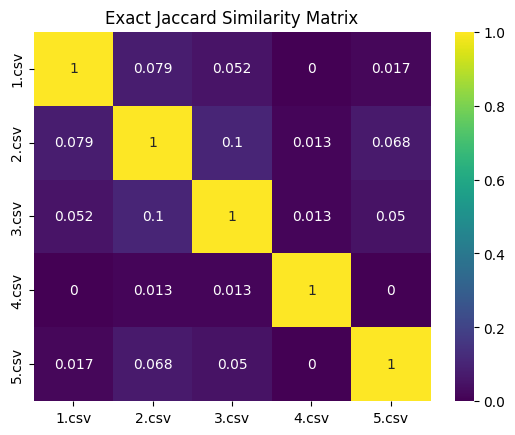

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

docs = ["1.csv", "2.csv", "3.csv","4.csv","5.csv"]
N = len(docs)
jaccard_matrix = np.zeros((N, N))

for i, doc1 in enumerate(docs):
    for j, doc2 in enumerate(docs):
        jaccard_matrix[i, j] = comparator.getJaccardSim(shingles_dict[doc1], shingles_dict[doc2])

sns.heatmap(jaccard_matrix, annot=True, xticklabels=docs, yticklabels=docs, cmap="viridis")
plt.title("Exact Jaccard Similarity Matrix")
plt.show()


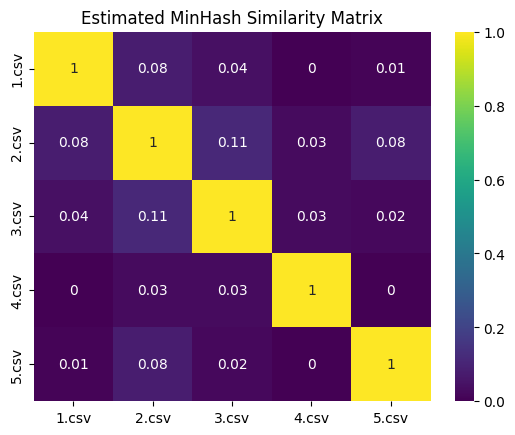

In [13]:
# --- Matrice estimée par MinHash ---
minhash_matrix = np.zeros((N, N))

for i, doc1 in enumerate(docs):
    for j, doc2 in enumerate(docs):
        # Construire la matrice des signatures pour le computeEstimateSimilarity
        sig_matrix = np.array([signatures[doc1], signatures[doc2]]).T
        minhash_matrix[i, j] = estimator.computeEstimateSimilarity(sig_matrix)

# --- Heatmap ---
sns.heatmap(minhash_matrix, annot=True, xticklabels=docs, yticklabels=docs, cmap="viridis")
plt.title("Estimated MinHash Similarity Matrix")
plt.show()

3.Comparing jaccard vs estimation

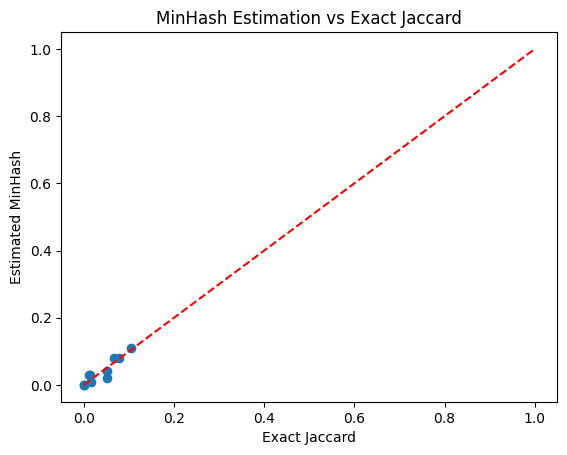

In [ ]:
# exact_values = []
# estimated_values = []

# for doc1, doc2 in itertools.combinations(docs, 2):
#     sig_matrix = np.array([signatures[doc1], signatures[doc2]]).T
#     est = estimator.computeEstimateSimilarity(sig_matrix)
#     exact = comparator.getJaccardSim(shingles_dict[doc1], shingles_dict[doc2])
#     exact_values.append(exact)
#     estimated_values.append(est)

# plt.scatter(exact_values, estimated_values)
# plt.plot([0,1],[0,1], 'r--')
# plt.xlabel("Exact Jaccard")
# plt.ylabel("Estimated MinHash")
# plt.title("MinHash Estimation vs Exact Jaccard")
# plt.show()

In [17]:
class MinHashing2:
    def __init__(self) -> None:
        print('MinHashing class')
        
    def buildSignature(self,set1,set2,nbPermut) -> float:
        
        union = np.unique(set1 + set2)
        mask1 = np.isin(union, set1)
        mask2 = np.isin(union, set2)
        
        signatureMatrix = np.empty((0, 2), int)
        for _ in range(nbPermut):
            permutedIndexes = np.random.permutation(len(union))
            lineSignatureMatrix = np.zeros((1,2))
            for i in range(len(permutedIndexes)):
                if(mask1[permutedIndexes[i]]):
                    lineSignatureMatrix[0][0]=i
                    break
            for j in range(len(permutedIndexes)):
                if(mask2[permutedIndexes[j]]):
                    lineSignatureMatrix[0][1]=j
                    break
            signatureMatrix = np.vstack((signatureMatrix, lineSignatureMatrix))

        return signatureMatrix

In [22]:

import time
estimator = CompareSignatures()
miniHasher = MinHashing2()
comparator = CompareSets()
fiveShingler = Shingling(10,False)

hashShingle = fiveShingler.uniqueHashShingling('data/1.csv')
test3 = fiveShingler.uniqueHashShingling('data/2.csv')

similarity = comparator.getJaccardSim(hashShingle,test3)
compute = []
permuts = [10**i for i in range(2,7)]
for i in permuts:
    e = time.time()
    signature = miniHasher.buildSignature(hashShingle,test3,i)
    estimate = estimator.computeEstimateSimilarity(signature)
    compute.append((e-time.time())*1000)

plt.scatter(i,compute)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("number of permutation")
plt.ylabel("time in ms")
plt.show()

Compare Signatures class
MinHashing class
Compare Sets class
